In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#from matplotlib.pyplot import rc_context
from tqdm import tqdm
#from scipy.optimize import curve_fit
#import random


#import scvi
#import pickle
#from adjustText import adjust_text

#import itertools


import senepy as sp #v0.1.0
from matplotlib.pyplot import rc_context

In [2]:
adata = sc.read_h5ad('../data/lethal_covid/integrated.h5ad')

In [3]:
len(adata.obs.Sample.unique().tolist())

27

In [4]:
len([x for x in adata.obs.Sample.unique().tolist() if 'cov' in x])

20

In [5]:
len([x for x in adata.obs.Sample.unique().tolist() if 'ctr' in x])

7

In [6]:
def annotate(x):
    if 'cov' in x:
        return 'COVID'
    else:
        return 'control'
    
adata.obs['status'] = adata.obs.Sample.map(annotate)

In [7]:
sc.set_figure_params(dpi_save = 600)

/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


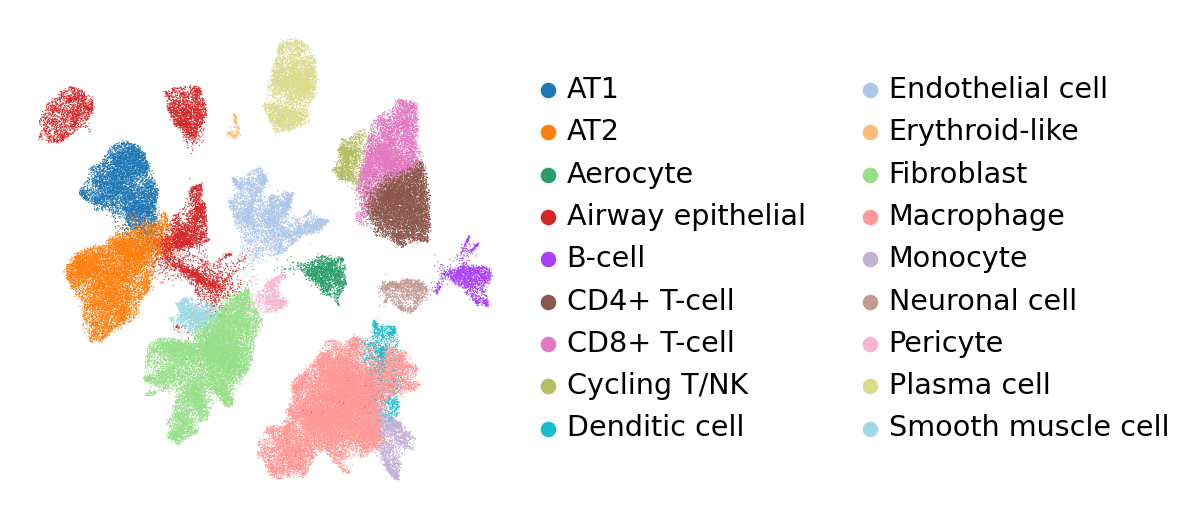

In [8]:
with rc_context({'figure.figsize': (4,4)}):
    sc.pl.umap(adata, color=['cell type'], frameon=False, title = '', save = '_7A.svg')
    #sc.pl.umap(adata, color=['status'])

In [7]:
hubs = sp.load_hubs(species = 'Human')

In [8]:
trans = sp.translator(data = adata, hub = hubs.hubs)

1576 of 40569 genes not initially present
40 of 1576 translated
1536 still not present


In [9]:
df = hubs.metadata

df[df.tissue.isin(['lung', 'blood'])]

,tissue,cell,hub_num,size,n_sen,hyp
0,blood,memory b cell,1,418,4,4.474175e-01
1,blood,monocyte,1,111,3,6.302843e-02
2,blood,monocyte,2,57,9,8.624843e-10
3,blood,naive b cell,0,167,1,7.478063e-01
4,blood,naive b cell,1,62,4,1.671133e-03
5,blood,neutrophil,0,812,4,9.030366e-01
6,blood,neutrophil,1,103,5,1.590839e-03
7,blood,nk cell,0,227,11,2.835945e-06
8,blood,nk cell,1,49,1,3.317478e-01
9,blood,t cell,1,56,1,3.691886e-01


In [107]:
sel_hubs = {k:v for (k,v) in hubs.hubs.items() if k[0] in ['lung', 'blood']}


###NOTE: have to rerun this with blood for lymph, without blood for the rest

In [108]:
list(sel_hubs)

[('blood', 'memory b cell', 1),
 ('blood', 'monocyte', 1),
 ('blood', 'monocyte', 2),
 ('blood', 'naive b cell', 0),
 ('blood', 'naive b cell', 1),
 ('blood', 'neutrophil', 0),
 ('blood', 'neutrophil', 1),
 ('blood', 'nk cell', 0),
 ('blood', 'nk cell', 1),
 ('blood', 't cell', 1),
 ('blood', 't cell', 2),
 ('blood', 't cell', 3),
 ('blood', 't cell', 4),
 ('lung', 'basal cell', 0),
 ('lung', 'ciliated epithelial cell', 0),
 ('lung', 'club cell', 0),
 ('lung', 'endothelial cell', 0),
 ('lung', 'endothelial cell', 1),
 ('lung', 'fibroblast', 0),
 ('lung', 'fibroblast', 1),
 ('lung', 'macrophage', 0),
 ('lung', 'macrophage', 1),
 ('lung', 'monocyte', 0),
 ('lung', 't cell', 0),
 ('lung', 'type ii pneumocyte', 0)]

In [109]:
cdata = adata.copy() #lets trim down

In [110]:
adata

AnnData object with n_obs × n_vars = 98979 × 20631
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell type', 'status'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell type_colors', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'rank_genes_groups', 'scvi_markers', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'hub_scores', 'sen_outlier'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [111]:
del cdata.layers['counts']

cdata.X = cdata.layers['scvi_normalized']
del cdata.layers['scvi_normalized']

In [112]:
for hub in sel_hubs:
    namer = '__'.join([str(x) for x in hub])
    cdata.obs[namer] = sp.score_all_cells(cdata, hub = sel_hubs[hub],
                                     translator= trans, binarize = False,
                                     identifiers = ['cell type'])

  0%|                                                    | 0/18 [00:00<?, ?it/s]

405/418(96.89%) genes present in data
406/418(97.13%) genes present in data after translation
Still not present: ['HBG2', 'PF4', 'HIST1H2AH', 'WASIR2', 'GP9', 'PGLYRP1', 'HBQ1', 'OSTN-AS1', 'CMTM5', 'AC144652.1', 'GPR15', 'SMIM1']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

95/111(85.59%) genes present in data
97/111(87.39%) genes present in data after translation
Still not present: ['HBG2', 'LINC00570', 'CMTM5', 'KRT1', 'HEMGN', 'BEND2', 'RUNDC3A', 'PF4V1', 'GP9', 'IFIT1B', 'HBQ1', 'AC147651.1', 'SMIM1', 'AQP10']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

44/57(77.19%) genes present in data
45/57(78.95%) genes present in data after translation
Still not present: ['SERPINB2', 'MMP8', 'ORM1', 'PGLYRP1', 'DEFA3', 'DEFA4', 'CRISP3', 'IFITM1', 'BPI', 'CD177', 'CEACAM8', 'TCN1']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

157/167(94.01%) genes present in data
157/167(94.01%) genes present in data after translation
Still not present: ['HBG2', 'HBM', 'PF4', 'IGHV3-74', 'HBQ1', 'CMTM5', 'BEND2', 'PF4V1', 'GP9', 'SMIM1']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

57/62(91.94%) genes present in data
58/62(93.55%) genes present in data after translation
Still not present: ['MMP8', 'PGLYRP1', 'DEFA3', 'CD177']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

794/812(97.78%) genes present in data
796/812(98.03%) genes present in data after translation
Still not present: ['HIST1H2AJ', 'RNASE2', 'PRTN3', 'HIST1H2AH', 'RNASE3', 'AHSP', 'HIST1H2AL', 'CTSG', 'OR6N1', 'HIST1H3G', 'SERPINB10', 'DEFA4', 'MS4A3', 'HIST1H3B', 'MPO', 'ELANE']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

96/103(93.2%) genes present in data
96/103(93.2%) genes present in data after translation
Still not present: ['AC129492.1', 'HBG2', 'PPBP', 'CMTM5', 'PF4', 'PF4V1', 'GP9']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

215/227(94.71%) genes present in data
216/227(95.15%) genes present in data after translation
Still not present: ['AC129492.1', 'DEFA3', 'CRISP3', 'PGLYRP1', 'NFE2', 'TCN1', 'CD177', 'MMP8', 'XCL1', 'BPI', 'CEACAM8']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

43/49(87.76%) genes present in data
43/49(87.76%) genes present in data after translation
Still not present: ['PF4V1', 'GP9', 'HBG2', 'CMTM5', 'BEND2', 'PF4']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

51/56(91.07%) genes present in data
51/56(91.07%) genes present in data after translation
Still not present: ['PF4V1', 'GP9', 'HBG2', 'CMTM5', 'PF4']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

165/178(92.7%) genes present in data
165/178(92.7%) genes present in data after translation
Still not present: ['HBM', 'NME8', 'CATSPER1', 'LIM2', 'SPTSSB', 'KIR2DL4', 'CYTL1', 'PRSS57', 'AHSP', 'XCL1', 'LINC01465', 'TRGV9', 'AC144652.1']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

84/88(95.45%) genes present in data
84/88(95.45%) genes present in data after translation
Still not present: ['HIST1H2BK', 'HIST1H2AL', 'HIST1H2AH', 'GPR15']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

123/133(92.48%) genes present in data
124/133(93.23%) genes present in data after translation
Still not present: ['DEFA3', 'CRISP3', 'PGLYRP1', 'NFE2', 'CD177', 'CXCR2', 'MMP8', 'BPI', 'CEACAM8']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

1917/1966(97.51%) genes present in data
1920/1966(97.66%) genes present in data after translation
Still not present: ['IGHV1-2', 'CKMT1B', 'PSAPL1', 'PRSS2', 'IGKV3-11', 'PRR36', 'CRABP2', 'RASSF10', 'KLK7', 'SSTR2', 'ARL14', 'MYLPF', 'KRT16', 'THTPA', 'AC083843.1', 'SERPINB4', 'UBD', 'FAM71A', 'IGLV3-21', 'HIST1H4J', 'MESP1', 'VGLL1', 'C1orf53', 'LCMT2', 'LYPD3', 'HRCT1', 'HCAR1', 'TCEAL2', 'ZFY', 'IGFL2', 'IFITM1', 'MIF-AS1', 'AADAC', 'SLC5A7', 'SP5', 'MUC21', 'SKIDA1', 'IGKV3-20', 'RGMB-AS1', 'IGLV3-19', 'IGKV1-39', 'TMEM59L', 'ZBED6', 'MRPL53', 'MYCL', 'FZD10']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

192/218(88.07%) genes present in data
192/218(88.07%) genes present in data after translation
Still not present: ['IGHV4-39', 'IGHV5-51', 'IGKV1-5', 'IGLV3-19', 'IGLV3-1', 'IGKV1-39', 'IGLV2-11', 'IGHV1-2', 'IGLV1-47', 'RBM24', 'IGKV3-11', 'IGLV3-21', 'ADH1C', 'IGLV1-40', 'AVPR1A', 'IGHV4-59', 'IGHV1-18', 'TIMP4', 'CCDC89', 'TEX26', 'FAM181A', 'IGHV3-21', 'LINC00326', 'IGKV3-20', 'EIF5AL1', 'GBP6']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

917/937(97.87%) genes present in data
918/937(97.97%) genes present in data after translation
Still not present: ['IGHV4-39', 'IGHV1-2', 'GPR87', 'LRRC55', 'DKK1', 'ZFY', 'NACA2', 'SYCE3', 'GSTA2', 'ALDH3A1', 'AADAC', 'AC159540.1', 'KLHDC7A', 'IGHV5-51', 'IGKV1-9', 'MUC21', 'TMEM59L', 'ZBED6', 'EIF5AL1']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

118/137(86.13%) genes present in data
118/137(86.13%) genes present in data after translation
Still not present: ['IGLV3-19', 'IGLV3-1', 'IGKV1-39', 'IGHV3-48', 'IGKV1-12', 'IGLV1-47', 'IGKV3-11', 'IGLV3-21', 'IGKV1D-39', 'IGLV1-40', 'IGHV4-59', 'IGHV3-43', 'AC159540.1', 'IGHV3-49', 'IGKV3-20', 'IGLV1-44', 'MIXL1', 'LAMP5', 'IGLV6-57']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

22/23(95.65%) genes present in data
22/23(95.65%) genes present in data after translation
Still not present: ['APLNR']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

28/35(80.0%) genes present in data
28/35(80.0%) genes present in data after translation
Still not present: ['CASQ2', 'AC140912.1', 'COX4I2', 'CABP1', 'ATP1B2', 'GJA4', 'NXPH3']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

546/556(98.2%) genes present in data
546/556(98.2%) genes present in data after translation
Still not present: ['NAALADL1', 'SLC48A1', 'PTGER1', 'HOXA7', 'DRD1', 'KIF26A', 'TCEAL7', 'SKIDA1', 'CCL11', 'ZBED6']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

54/55(98.18%) genes present in data
54/55(98.18%) genes present in data after translation
Still not present: ['RNASE2']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

248/268(92.54%) genes present in data
248/268(92.54%) genes present in data after translation
Still not present: ['IGHV4-39', 'IGHV5-51', 'ZG16B', 'IGHV1-2', 'IGKV3-11', 'SLAMF9', 'CCL7', 'IGLV2-14', 'IGKV3-20', 'CYP27B1', 'IGLV3-19', 'IGLV3-1', 'IGKV1-39', 'GPR84', 'IGLV1-47', 'IGLC7', 'IGLV3-21', 'METTL7B', 'PLA2G2D', 'EIF5AL1']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

386/404(95.54%) genes present in data
386/404(95.54%) genes present in data after translation
Still not present: ['LMOD3', 'CD207', 'CD1A', 'IGKV3-11', 'PLD4', 'XCR1', 'CCL7', 'IGLV2-14', 'CXCR3', 'ELAVL4', 'TIFAB', 'TMEM229B', 'UBD', 'GPR84', 'IGLV3-21', 'IL22RA2', 'EIF5AL1', 'PPM1J']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

586/591(99.15%) genes present in data
586/591(99.15%) genes present in data after translation
Still not present: ['SERPINA9', 'VPREB3', 'AICDA', 'EIF5AL1', 'ACY3']


  0%|                                                    | 0/18 [00:00<?, ?it/s]

329/344(95.64%) genes present in data
330/344(95.93%) genes present in data after translation
Still not present: ['IGHV5-51', 'AGTR2', 'UNC5B-AS1', 'IGKV3-11', 'GFRA3', 'C2CD4A', 'IGHV1-18', 'MUC21', 'FGA', 'IGLV3-19', 'IGKV1-39', 'HABP2', 'IGLV3-21', 'GJB1']


100%|███████████████████████████████████████████| 18/18 [00:18<00:00,  1.01s/it]


In [113]:
cdata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,...,lung__club cell__0,lung__endothelial cell__0,lung__endothelial cell__1,lung__fibroblast__0,lung__fibroblast__1,lung__macrophage__0,lung__macrophage__1,lung__monocyte__0,lung__t cell__0,lung__type ii pneumocyte__0
TTTGACTAGAGCCGAT-1_15,L08cov,False,2576,2576,5714.0,0.0,0.0,1.0,0.017501,0,...,143.206467,8.728302,2.863707,8.753129,38.887484,2.223628,39.215586,15.021500,39.177921,57.824516
TTAGTCTGTATTTCCT-1_15,L08cov,False,2546,2546,5608.0,0.0,0.0,19.0,0.338802,0,...,180.327505,4.575580,3.838451,11.461348,29.333807,2.045903,29.503050,13.359651,34.612511,30.885882
AGGCATTCAGCTACAT-1_15,L08cov,False,2527,2527,5431.0,0.0,0.0,0.0,0.000000,0,...,243.741986,6.440374,5.929794,6.518264,24.525597,3.485775,24.881672,11.164817,37.809081,29.971177
GGTGATTAGAGGATCC-1_15,L08cov,False,2531,2531,5489.0,0.0,0.0,0.0,0.000000,0,...,171.396820,8.306305,3.684074,11.015051,34.729549,2.721257,34.893373,15.741484,38.350233,44.987679
CAGTTCCGTAGCACAG-1_15,L08cov,False,2503,2503,5446.0,0.0,0.0,10.0,0.183621,0,...,223.952786,8.357380,10.600519,8.105825,36.261404,6.369740,52.882263,14.443731,47.094093,71.994447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,L22cov,False,344,344,413.0,0.0,0.0,0.0,0.000000,0,...,221.515185,9.375123,6.356730,6.570217,22.488514,9.969179,45.689624,16.113120,61.111033,75.428477
CGTGAATCATGTCTAG-1_27,L22cov,False,350,350,402.0,0.0,0.0,0.0,0.000000,0,...,289.090283,34.268705,7.762557,1.556253,19.244949,4.799488,76.734699,15.002835,75.267679,68.615464
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,...,182.004928,6.491466,3.699337,9.871915,25.865359,4.119434,29.357259,15.527890,46.413932,39.436037
AGGGTGAGTATCAGGG-1_27,L22cov,False,331,331,402.0,0.0,0.0,0.0,0.000000,0,...,215.121251,7.316855,4.230887,10.749328,32.018434,5.251936,31.180754,15.273919,49.685065,52.100732


In [114]:
df = cdata.obs[cdata.obs.columns[15:]]

In [115]:
df

,blood__memory b cell__1,blood__monocyte__1,blood__monocyte__2,blood__naive b cell__0,blood__naive b cell__1,blood__neutrophil__0,blood__neutrophil__1,blood__nk cell__0,blood__nk cell__1,blood__t cell__1,...,lung__club cell__0,lung__endothelial cell__0,lung__endothelial cell__1,lung__fibroblast__0,lung__fibroblast__1,lung__macrophage__0,lung__macrophage__1,lung__monocyte__0,lung__t cell__0,lung__type ii pneumocyte__0
TTTGACTAGAGCCGAT-1_15,8.363851,43.202694,7.760973,18.937812,30.384838,54.397248,30.863102,69.761387,20.267349,19.746434,...,143.206467,8.728302,2.863707,8.753129,38.887484,2.223628,39.215586,15.021500,39.177921,57.824516
TTAGTCTGTATTTCCT-1_15,7.194328,21.326872,4.222811,10.650945,14.859015,55.703329,17.832111,224.310269,9.477271,8.606944,...,180.327505,4.575580,3.838451,11.461348,29.333807,2.045903,29.503050,13.359651,34.612511,30.885882
AGGCATTCAGCTACAT-1_15,9.668709,29.215453,8.425998,14.990402,17.714562,49.598051,23.004784,49.036876,16.425057,10.887236,...,243.741986,6.440374,5.929794,6.518264,24.525597,3.485775,24.881672,11.164817,37.809081,29.971177
GGTGATTAGAGGATCC-1_15,8.077661,33.778819,5.649001,14.711623,23.172616,58.845422,23.624566,93.359908,13.456137,12.894543,...,171.396820,8.306305,3.684074,11.015051,34.729549,2.721257,34.893373,15.741484,38.350233,44.987679
CAGTTCCGTAGCACAG-1_15,7.931368,53.721979,2.384459,20.937939,13.288443,52.595757,36.283288,115.807911,29.823104,36.836452,...,223.952786,8.357380,10.600519,8.105825,36.261404,6.369740,52.882263,14.443731,47.094093,71.994447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,10.251983,47.115637,5.756770,24.260912,15.875546,65.724150,50.939800,97.609588,29.780930,73.748282,...,221.515185,9.375123,6.356730,6.570217,22.488514,9.969179,45.689624,16.113120,61.111033,75.428477
CGTGAATCATGTCTAG-1_27,12.096406,10.187617,4.829562,20.840932,46.375547,62.336332,23.042170,202.098086,13.056975,12.905801,...,289.090283,34.268705,7.762557,1.556253,19.244949,4.799488,76.734699,15.002835,75.267679,68.615464
GCCGATGAGTAAACGT-1_27,8.444814,28.927169,4.996073,16.673910,18.100074,78.520213,27.785850,95.689251,22.225025,18.043230,...,182.004928,6.491466,3.699337,9.871915,25.865359,4.119434,29.357259,15.527890,46.413932,39.436037
AGGGTGAGTATCAGGG-1_27,9.426707,30.737440,6.765601,14.147796,19.325337,71.073473,25.795422,77.373797,12.689880,15.998554,...,215.121251,7.316855,4.230887,10.749328,32.018434,5.251936,31.180754,15.273919,49.685065,52.100732


In [20]:
#df.to_pickle('../data/files/R1_12_LETHAL_COVID_SEN_SCORES.pickle')

In [17]:
df = pd.read_pickle('../data/files/R1_12_LETHAL_COVID_SEN_SCORES.pickle')

In [120]:
df

,blood__memory b cell__1,blood__monocyte__1,blood__monocyte__2,blood__naive b cell__0,blood__naive b cell__1,blood__neutrophil__0,blood__neutrophil__1,blood__nk cell__0,blood__nk cell__1,blood__t cell__1,...,lung__club cell__0,lung__endothelial cell__0,lung__endothelial cell__1,lung__fibroblast__0,lung__fibroblast__1,lung__macrophage__0,lung__macrophage__1,lung__monocyte__0,lung__t cell__0,lung__type ii pneumocyte__0
TTTGACTAGAGCCGAT-1_15,8.363851,43.202694,7.760973,18.937812,30.384838,54.397248,30.863102,69.761387,20.267349,19.746434,...,143.206467,8.728302,2.863707,8.753129,38.887484,2.223628,39.215586,15.021500,39.177921,57.824516
TTAGTCTGTATTTCCT-1_15,7.194328,21.326872,4.222811,10.650945,14.859015,55.703329,17.832111,224.310269,9.477271,8.606944,...,180.327505,4.575580,3.838451,11.461348,29.333807,2.045903,29.503050,13.359651,34.612511,30.885882
AGGCATTCAGCTACAT-1_15,9.668709,29.215453,8.425998,14.990402,17.714562,49.598051,23.004784,49.036876,16.425057,10.887236,...,243.741986,6.440374,5.929794,6.518264,24.525597,3.485775,24.881672,11.164817,37.809081,29.971177
GGTGATTAGAGGATCC-1_15,8.077661,33.778819,5.649001,14.711623,23.172616,58.845422,23.624566,93.359908,13.456137,12.894543,...,171.396820,8.306305,3.684074,11.015051,34.729549,2.721257,34.893373,15.741484,38.350233,44.987679
CAGTTCCGTAGCACAG-1_15,7.931368,53.721979,2.384459,20.937939,13.288443,52.595757,36.283288,115.807911,29.823104,36.836452,...,223.952786,8.357380,10.600519,8.105825,36.261404,6.369740,52.882263,14.443731,47.094093,71.994447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,10.251983,47.115637,5.756770,24.260912,15.875546,65.724150,50.939800,97.609588,29.780930,73.748282,...,221.515185,9.375123,6.356730,6.570217,22.488514,9.969179,45.689624,16.113120,61.111033,75.428477
CGTGAATCATGTCTAG-1_27,12.096406,10.187617,4.829562,20.840932,46.375547,62.336332,23.042170,202.098086,13.056975,12.905801,...,289.090283,34.268705,7.762557,1.556253,19.244949,4.799488,76.734699,15.002835,75.267679,68.615464
GCCGATGAGTAAACGT-1_27,8.444814,28.927169,4.996073,16.673910,18.100074,78.520213,27.785850,95.689251,22.225025,18.043230,...,182.004928,6.491466,3.699337,9.871915,25.865359,4.119434,29.357259,15.527890,46.413932,39.436037
AGGGTGAGTATCAGGG-1_27,9.426707,30.737440,6.765601,14.147796,19.325337,71.073473,25.795422,77.373797,12.689880,15.998554,...,215.121251,7.316855,4.230887,10.749328,32.018434,5.251936,31.180754,15.273919,49.685065,52.100732


In [121]:
adata.obsm['hub_scores'] = df

In [122]:
def find_outliers(scores, mult = 3):
    sd = scores.std()
    mu = scores.mean()
    
    thresh = mu + mult*sd
    
    return scores > thresh
    

In [123]:
# #
# big_out = []
# removers = [] #may not use this but keey for now
# for i, row in adata.obs[['cell type', 'Sample']].drop_duplicates().iterrows():
    
#     sub = adata[(adata.obs['cell type'] == row['cell type']) & (adata.obs.Sample == row.Sample)]
    

#     out = []
#     for hub in sub.obsm['hub_scores'].columns:


#         out.append(find_outliers(sub.obsm['hub_scores'][hub], mult = 3))


#     big_out.append(pd.concat(out, axis = 1))
        
#     if len(sub) < 100:
#         removers.append([row.Sample, row['cell type']])
            

In [124]:
big_out = []

for cell in adata.obs['cell type'].unique():
    #print(tissue, cell)

    sub = adata[adata.obs['cell type'] == cell]

    out = []
    for hub in sub.obsm['hub_scores'].columns:


        out.append(find_outliers(sub.obsm['hub_scores'][hub], mult = 3))

      
    big_out.append(pd.concat(out, axis = 1))
    

In [125]:
adata.obsm['sen_outlier'] = pd.concat(big_out).reindex(adata.obs.index)
adata.obsm['sen_outlier']

,blood__memory b cell__1,blood__monocyte__1,blood__monocyte__2,blood__naive b cell__0,blood__naive b cell__1,blood__neutrophil__0,blood__neutrophil__1,blood__nk cell__0,blood__nk cell__1,blood__t cell__1,...,lung__club cell__0,lung__endothelial cell__0,lung__endothelial cell__1,lung__fibroblast__0,lung__fibroblast__1,lung__macrophage__0,lung__macrophage__1,lung__monocyte__0,lung__t cell__0,lung__type ii pneumocyte__0
TTTGACTAGAGCCGAT-1_15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TTAGTCTGTATTTCCT-1_15,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
AGGCATTCAGCTACAT-1_15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GGTGATTAGAGGATCC-1_15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
CAGTTCCGTAGCACAG-1_15,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CGTGAATCATGTCTAG-1_27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GCCGATGAGTAAACGT-1_27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AGGGTGAGTATCAGGG-1_27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Epithelial

In [44]:
epi = adata[adata.obs['cell type'].isin(['AT1', 'AT2', 'Airway epithelial'])]

In [45]:
epi

View of AnnData object with n_obs × n_vars = 25423 × 20631
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell type', 'status'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell type_colors', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'rank_genes_groups', 'scvi_markers', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'hub_scores', 'sen_outlier'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [46]:
# epi.obsm['sen_outlier'] = epi.obsm['sen_outlier'][['lung__basal cell__0',
#                         'lung__ciliated epithelial cell__0',
#  'lung__club cell__0',
#  'lung__type ii pneumocyte__0']]


# epi.obsm['sen_outlier'] = epi.obsm['sen_outlier'][[
#                         'lung__ciliated epithelial cell__0', 'lung__basal cell__0']]

#'lung__ciliated epithelial cell__0 good

#lung__basal cell__0 lung__club cell__0 ok 

In [47]:
epi.obs['num outliers'] = epi.obsm['sen_outlier'].sum(axis = 1)

/tmp/ipykernel_2466154/1264907249.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  epi.obs['num outliers'] = epi.obsm['sen_outlier'].sum(axis = 1)


In [48]:
epi.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,status,num outliers
TTTGACTAGAGCCGAT-1_15,L08cov,False,2576,2576,5714.0,0.0,0.0,1.0,0.017501,0,0,4,1.754386,AT1,COVID,0
TTAGTCTGTATTTCCT-1_15,L08cov,False,2546,2546,5608.0,0.0,0.0,19.0,0.338802,0,0,9,1.787630,AT2,COVID,0
AGGCATTCAGCTACAT-1_15,L08cov,False,2527,2527,5431.0,0.0,0.0,0.0,0.000000,0,0,15,1.843998,Airway epithelial,COVID,0
GGTGATTAGAGGATCC-1_15,L08cov,False,2531,2531,5489.0,0.0,0.0,0.0,0.000000,0,0,9,1.827819,AT2,COVID,1
GTTCCGTAGACCCGCT-1_15,L08cov,False,2295,2295,5465.0,0.0,0.0,3.0,0.054895,0,0,4,1.832845,AT1,COVID,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGCTTCCAGGCATGCA-1_27,L22cov,False,360,360,407.0,0.0,0.0,0.0,0.000000,0,0,9,24.570024,AT2,COVID,0
GCACGGTCAGAAGTTA-1_27,L22cov,False,336,336,402.0,0.0,0.0,0.0,0.000000,0,0,9,24.937656,AT2,COVID,1
TTGTGGATCATAGGCT-1_27,L22cov,False,329,329,406.0,0.0,0.0,1.0,0.246305,0,0,9,24.752476,AT2,COVID,0
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,0,3,25.000000,AT2,COVID,0


In [49]:
len(epi.obs[epi.obs['num outliers'] > 0])/len(epi)

0.07363411084451088

In [50]:
epi.obs['has outlier'] = epi.obs['num outliers'] > 0

In [51]:
epi.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,status,num outliers,has outlier
TTTGACTAGAGCCGAT-1_15,L08cov,False,2576,2576,5714.0,0.0,0.0,1.0,0.017501,0,0,4,1.754386,AT1,COVID,0,False
TTAGTCTGTATTTCCT-1_15,L08cov,False,2546,2546,5608.0,0.0,0.0,19.0,0.338802,0,0,9,1.787630,AT2,COVID,0,False
AGGCATTCAGCTACAT-1_15,L08cov,False,2527,2527,5431.0,0.0,0.0,0.0,0.000000,0,0,15,1.843998,Airway epithelial,COVID,0,False
GGTGATTAGAGGATCC-1_15,L08cov,False,2531,2531,5489.0,0.0,0.0,0.0,0.000000,0,0,9,1.827819,AT2,COVID,1,True
GTTCCGTAGACCCGCT-1_15,L08cov,False,2295,2295,5465.0,0.0,0.0,3.0,0.054895,0,0,4,1.832845,AT1,COVID,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGCTTCCAGGCATGCA-1_27,L22cov,False,360,360,407.0,0.0,0.0,0.0,0.000000,0,0,9,24.570024,AT2,COVID,0,False
GCACGGTCAGAAGTTA-1_27,L22cov,False,336,336,402.0,0.0,0.0,0.0,0.000000,0,0,9,24.937656,AT2,COVID,1,True
TTGTGGATCATAGGCT-1_27,L22cov,False,329,329,406.0,0.0,0.0,1.0,0.246305,0,0,9,24.752476,AT2,COVID,0,False
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,0,3,25.000000,AT2,COVID,0,False


In [52]:
epi_res = epi.obs.groupby(['cell type', 'Sample']).count()[['doublet']].reset_index()
epi_res = epi_res.rename(columns={'doublet':'n cells'})
epi_res['status'] = epi_res.Sample.map(annotate)

/tmp/ipykernel_2466154/2700832879.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  epi_res = epi.obs.groupby(['cell type', 'Sample']).count()[['doublet']].reset_index()


In [53]:
epi_res

,cell type,Sample,n cells,status
0,AT1,C51ctr,743,control
1,AT1,C52ctr,907,control
2,AT1,C53ctr,243,control
3,AT1,C54ctr,607,control
4,AT1,C55ctr,490,control
...,...,...,...,...
76,Airway epithelial,L17cov,213,COVID
77,Airway epithelial,L18cov,30,COVID
78,Airway epithelial,L19cov,146,COVID
79,Airway epithelial,L21cov,80,COVID


In [54]:
epi_res['n sen'] = epi.obs[['cell type', 'Sample', 'has outlier']].groupby(['cell type', 'Sample']).sum()['has outlier'].values

/tmp/ipykernel_2466154/2836031307.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  epi_res['n sen'] = epi.obs[['cell type', 'Sample', 'has outlier']].groupby(['cell type', 'Sample']).sum()['has outlier'].values


In [55]:
epi_res['% sen'] = epi_res['n sen']/epi_res['n cells'] * 100

In [56]:
epi_res

,cell type,Sample,n cells,status,n sen,% sen
0,AT1,C51ctr,743,control,2,0.269179
1,AT1,C52ctr,907,control,11,1.212789
2,AT1,C53ctr,243,control,32,13.168724
3,AT1,C54ctr,607,control,0,0.000000
4,AT1,C55ctr,490,control,77,15.714286
...,...,...,...,...,...,...
76,Airway epithelial,L17cov,213,COVID,7,3.286385
77,Airway epithelial,L18cov,30,COVID,10,33.333333
78,Airway epithelial,L19cov,146,COVID,13,8.904110
79,Airway epithelial,L21cov,80,COVID,2,2.500000


In [57]:
# for remover in removers:
#     epi_res = epi_res[~((epi_res['cell type'] == remover[1]) & (epi_res.Sample == remover[0]))]

In [58]:
import matplotlib as mpl
import textwrap
mpl.rcdefaults()

### Fig 7C

/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


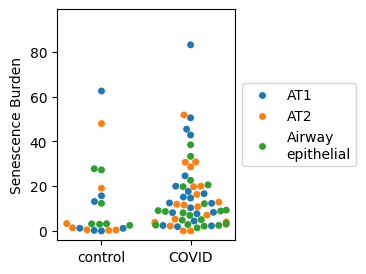

In [59]:
plt.figure(figsize=(2.3,3))

ax = sns.swarmplot(data = epi_res, x = 'status', y = '% sen', hue='cell type')



leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Now wrap the texts in the legend
for text in leg.get_texts():
    text.set_text(textwrap.fill(text.get_text(), 10))  # Adjust 20 if necessary



# x1, x2 = 0, 1  
# y, h, col = epi_res['% sen'].max() + 8, 0.1, 'k'  # y position and height of the bar, color

# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "0.005", ha='center', va='bottom', color=col)

plt.ylim(top = 99)

plt.xlabel('')
plt.ylabel('Senescence Burden')


plt.savefig('figures/R1_7C.png',dpi = 600, bbox_inches = 'tight')
plt.savefig('figures/R1_7C.svg',bbox_inches = 'tight')


plt.show()

In [60]:
x = epi_res[epi_res.status == 'COVID']['% sen']
y = epi_res[epi_res.status == 'control']['% sen']

stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=811.0, pvalue=0.05173817958299097)

## Macrophage

In [61]:
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,status
TTTGACTAGAGCCGAT-1_15,L08cov,False,2576,2576,5714.0,0.0,0.0,1.0,0.017501,0,0,4,1.754386,AT1,COVID
TTAGTCTGTATTTCCT-1_15,L08cov,False,2546,2546,5608.0,0.0,0.0,19.0,0.338802,0,0,9,1.787630,AT2,COVID
AGGCATTCAGCTACAT-1_15,L08cov,False,2527,2527,5431.0,0.0,0.0,0.0,0.000000,0,0,15,1.843998,Airway epithelial,COVID
GGTGATTAGAGGATCC-1_15,L08cov,False,2531,2531,5489.0,0.0,0.0,0.0,0.000000,0,0,9,1.827819,AT2,COVID
CAGTTCCGTAGCACAG-1_15,L08cov,False,2503,2503,5446.0,0.0,0.0,10.0,0.183621,0,0,1,1.840604,Fibroblast,COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,L22cov,False,344,344,413.0,0.0,0.0,0.0,0.000000,0,0,1,24.213076,Fibroblast,COVID
CGTGAATCATGTCTAG-1_27,L22cov,False,350,350,402.0,0.0,0.0,0.0,0.000000,0,0,0,24.937656,Macrophage,COVID
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,0,3,25.000000,AT2,COVID
AGGGTGAGTATCAGGG-1_27,L22cov,False,331,331,402.0,0.0,0.0,0.0,0.000000,0,0,9,24.937656,AT2,COVID


In [62]:
mac = adata[adata.obs['cell type'] == 'Macrophage']

In [63]:
mac

View of AnnData object with n_obs × n_vars = 23406 × 20631
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell type', 'status'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell type_colors', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'rank_genes_groups', 'scvi_markers', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'hub_scores', 'sen_outlier'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [64]:
mac.obsm['sen_outlier'] = mac.obsm['sen_outlier'][['lung__macrophage__1']]

/tmp/ipykernel_2466154/797169429.py:1: ImplicitModificationWarning: Setting element `.obsm['sen_outlier']` of view, initializing view as actual.
  mac.obsm['sen_outlier'] = mac.obsm['sen_outlier'][['lung__macrophage__1']]


In [65]:
mac.obs['num outliers'] = mac.obsm['sen_outlier'].sum(axis = 1)

In [66]:
mac_res = mac.obs.groupby(['Sample']).count()[['doublet']].reset_index()
mac_res = mac_res.rename(columns={'doublet':'n cells'})
mac_res['status'] = mac_res.Sample.map(annotate)

/tmp/ipykernel_2466154/2141140208.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mac_res = mac.obs.groupby(['Sample']).count()[['doublet']].reset_index()


In [67]:
mac.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,status,num outliers
TGGGATTCACGCAAAG-1_15,L08cov,False,2358,2358,5261.0,0.0,0.0,2.0,0.038016,0,0,8,1.901502,Macrophage,COVID,0
GATCACATCGCCCAGA-1_15,L08cov,False,2475,2475,5053.0,0.0,0.0,7.0,0.138532,0,0,0,1.981375,Macrophage,COVID,0
CACACAATCGTTCGCT-1_15,L08cov,False,2459,2459,5083.0,0.0,0.0,13.0,0.255754,0,0,0,1.969667,Macrophage,COVID,0
TCTATACGTAATGCTC-1_15,L08cov,False,2439,2439,5028.0,0.0,0.0,14.0,0.278441,0,0,0,1.993223,Macrophage,COVID,0
AAAGTGAAGAGTCACG-1_15,L08cov,False,2532,2532,4814.0,0.0,0.0,5.0,0.103864,0,0,0,2.079434,Macrophage,COVID,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCAATTCGTTGTCAGT-1_27,L22cov,False,330,330,402.0,0.0,0.0,0.0,0.000000,0,0,12,24.875622,Macrophage,COVID,0
CACACAAGTGGACTGA-1_27,L22cov,False,318,318,402.0,0.0,0.0,0.0,0.000000,0,0,12,24.875622,Macrophage,COVID,0
TCATCATCAATAGTAG-1_27,L22cov,False,330,330,412.0,0.0,0.0,0.0,0.000000,0,0,0,24.509806,Macrophage,COVID,0
CGTGAATCATGTCTAG-1_27,L22cov,False,350,350,402.0,0.0,0.0,0.0,0.000000,0,0,0,24.937656,Macrophage,COVID,0


In [68]:
mac_res['n sen'] = mac.obs[['Sample', 'num outliers']].groupby(['Sample']).sum()['num outliers'].values

/tmp/ipykernel_2466154/1784623819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mac_res['n sen'] = mac.obs[['Sample', 'num outliers']].groupby(['Sample']).sum()['num outliers'].values


In [69]:
mac_res['% sen'] = mac_res['n sen']/mac_res['n cells'] * 100
mac_res['cell type'] = 'Macrophage'

In [70]:
# for remover in removers:
#     mac_res = mac_res[~((mac_res['cell type'] == remover[1]) & (mac_res.Sample == remover[0]))]

In [71]:
mac_res

,Sample,n cells,status,n sen,% sen,cell type
0,C51ctr,350,control,0,0.000000,Macrophage
1,C52ctr,394,control,0,0.000000,Macrophage
2,C53ctr,823,control,0,0.000000,Macrophage
3,C54ctr,389,control,0,0.000000,Macrophage
4,C55ctr,708,control,3,0.423729,Macrophage
5,C56ctr,449,control,1,0.222717,Macrophage
6,C57ctr,348,control,0,0.000000,Macrophage
7,L01cov,422,COVID,0,0.000000,Macrophage
8,L03cov,1538,COVID,5,0.325098,Macrophage
9,L04cov,1197,COVID,3,0.250627,Macrophage


<Axes: xlabel='status', ylabel='% sen'>

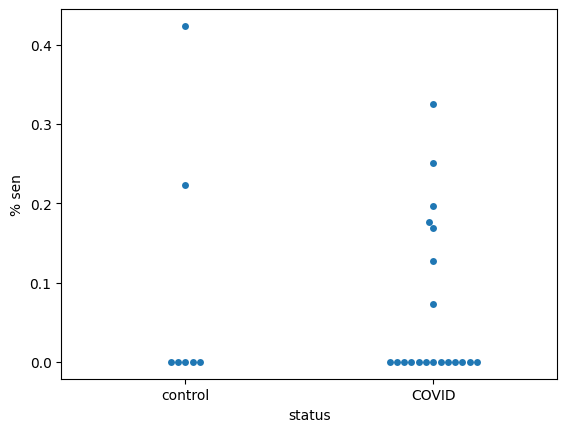

In [72]:
sns.swarmplot(data = mac_res, x = 'status', y = '% sen')

In [73]:
x = mac_res[mac_res.status == 'COVID']['% sen']
y = mac_res[mac_res.status == 'control']['% sen']

stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=69.5, pvalue=1.0)

In [76]:
mac.obsm['sen_outlier']

,lung__macrophage__1
TGGGATTCACGCAAAG-1_15,False
GATCACATCGCCCAGA-1_15,False
CACACAATCGTTCGCT-1_15,False
TCTATACGTAATGCTC-1_15,False
AAAGTGAAGAGTCACG-1_15,False
...,...
TCAATTCGTTGTCAGT-1_27,False
CACACAAGTGGACTGA-1_27,False
TCATCATCAATAGTAG-1_27,False
CGTGAATCATGTCTAG-1_27,False


## Fibs

In [77]:
fib = adata[adata.obs['cell type'] == 'Fibroblast']

In [80]:
hubs.metadata[hubs.metadata.tissue == 'lung']

,tissue,cell,hub_num,size,n_sen,hyp
42,lung,basal cell,0,1966,25,1.793375e-02
43,lung,ciliated epithelial cell,0,218,3,2.645555e-01
44,lung,club cell,0,937,14,2.212692e-02
45,lung,endothelial cell,0,137,2,3.090153e-01
46,lung,endothelial cell,1,23,0,1.000000e+00
47,lung,fibroblast,0,35,0,1.000000e+00
48,lung,fibroblast,1,556,4,6.704579e-01
49,lung,macrophage,0,55,0,1.000000e+00
50,lung,macrophage,1,268,19,8.432322e-13
51,lung,monocyte,0,404,18,6.502775e-09


In [81]:
fib.obsm['sen_outlier'] = fib.obsm['sen_outlier'][['lung__fibroblast__1']]

/tmp/ipykernel_2466154/3462909281.py:1: ImplicitModificationWarning: Setting element `.obsm['sen_outlier']` of view, initializing view as actual.
  fib.obsm['sen_outlier'] = fib.obsm['sen_outlier'][['lung__fibroblast__1']]


In [82]:
fib.obs['num outliers'] = fib.obsm['sen_outlier'].sum(axis = 1)

In [83]:
fib_res = fib.obs.groupby(['Sample']).count()[['doublet']].reset_index()
fib_res = fib_res.rename(columns={'doublet':'n cells'})
fib_res['status'] = fib_res.Sample.map(annotate)

/tmp/ipykernel_2466154/4046850836.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fib_res = fib.obs.groupby(['Sample']).count()[['doublet']].reset_index()


In [84]:
fib_res['n sen'] = fib.obs[['Sample', 'num outliers']].groupby(['Sample']).sum()['num outliers'].values

/tmp/ipykernel_2466154/2945129528.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fib_res['n sen'] = fib.obs[['Sample', 'num outliers']].groupby(['Sample']).sum()['num outliers'].values


In [85]:
fib_res['% sen'] = fib_res['n sen']/fib_res['n cells'] * 100
fib_res['cell type'] = 'Fibroblast'

In [86]:
for remover in removers:
    fib_res = fib_res[~((fib_res['cell type'] == remover[1]) & (fib_res.Sample == remover[0]))]

In [87]:
fib_res

,Sample,n cells,status,n sen,% sen,cell type
0,C51ctr,695,control,0,0.000000,Fibroblast
1,C52ctr,351,control,0,0.000000,Fibroblast
2,C53ctr,648,control,0,0.000000,Fibroblast
3,C54ctr,637,control,0,0.000000,Fibroblast
4,C55ctr,805,control,0,0.000000,Fibroblast
5,C56ctr,535,control,2,0.373832,Fibroblast
6,C57ctr,537,control,0,0.000000,Fibroblast
7,L01cov,414,COVID,0,0.000000,Fibroblast
8,L03cov,434,COVID,0,0.000000,Fibroblast
9,L04cov,323,COVID,0,0.000000,Fibroblast


<Axes: xlabel='status', ylabel='% sen'>

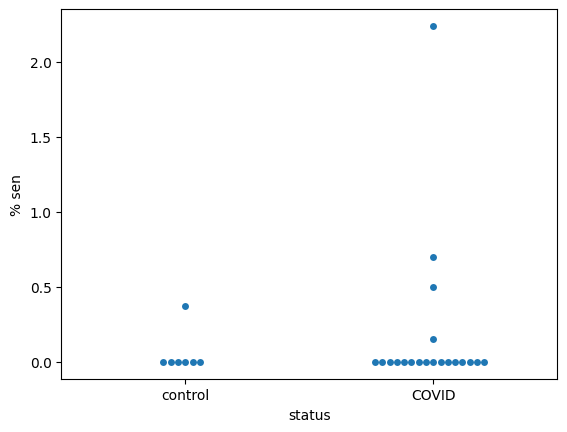

In [88]:
sns.swarmplot(data = fib_res, x = 'status', y = '% sen')

In [89]:
x = fib_res[fib_res.status == 'COVID']['% sen']
y = fib_res[fib_res.status == 'control']['% sen']

stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=75.0, pvalue=0.7133682102094849)

## ECs

In [90]:
ec = adata[adata.obs['cell type'].isin(['Endothelial cell', 'Aerocyte'])]
ec.obsm['sen_outlier'] = ec.obsm['sen_outlier'][['lung__endothelial cell__0',
                        'lung__endothelial cell__1']]
ec.obs['num outliers'] = ec.obsm['sen_outlier'].sum(axis = 1)
ec.obs['has outlier'] = ec.obs['num outliers'] > 0


/tmp/ipykernel_2466154/458027258.py:2: ImplicitModificationWarning: Setting element `.obsm['sen_outlier']` of view, initializing view as actual.
  ec.obsm['sen_outlier'] = ec.obsm['sen_outlier'][['lung__endothelial cell__0',


In [91]:
ec_res = ec.obs.groupby(['cell type', 'Sample']).count()[['doublet']].reset_index()
ec_res = ec_res.rename(columns={'doublet':'n cells'})
ec_res['status'] = ec_res.Sample.map(annotate)

/tmp/ipykernel_2466154/4226821782.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ec_res = ec.obs.groupby(['cell type', 'Sample']).count()[['doublet']].reset_index()


In [92]:
ec_res['n sen'] = ec.obs[['cell type', 'Sample', 'num outliers']].groupby(['cell type', 'Sample']).sum()['num outliers'].values
ec_res['% sen'] = ec_res['n sen']/ec_res['n cells'] * 100


/tmp/ipykernel_2466154/692141100.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ec_res['n sen'] = ec.obs[['cell type', 'Sample', 'num outliers']].groupby(['cell type', 'Sample']).sum()['num outliers'].values


In [93]:
for remover in removers:
    ec_res = ec_res[~((ec_res['cell type'] == remover[1]) & (ec_res.Sample == remover[0]))]

In [94]:
ec_res

,cell type,Sample,n cells,status,n sen,% sen
8,Aerocyte,L03cov,121,COVID,9,7.438017
12,Aerocyte,L06cov,107,COVID,2,1.869159
14,Aerocyte,L08cov,103,COVID,2,1.941748
19,Aerocyte,L13cov,108,COVID,0,0.000000
22,Aerocyte,L17cov,216,COVID,2,0.925926
23,Aerocyte,L18cov,121,COVID,1,0.826446
27,Endothelial cell,C51ctr,547,control,7,1.279707
28,Endothelial cell,C52ctr,302,control,4,1.324503
29,Endothelial cell,C53ctr,283,control,15,5.300353
30,Endothelial cell,C54ctr,160,control,0,0.000000


<Axes: xlabel='status', ylabel='% sen'>

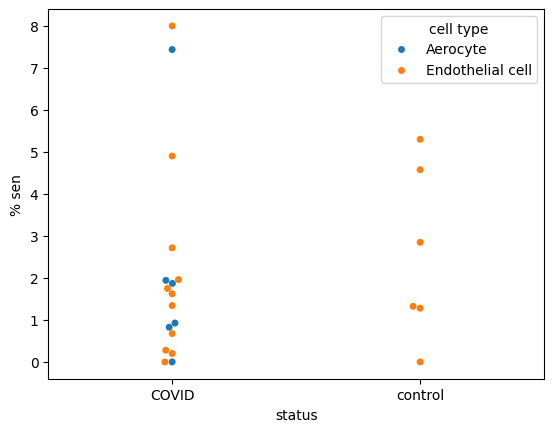

In [95]:
sns.swarmplot(data = ec_res, x = 'status', y = '% sen', hue='cell type')

# T/B

In [126]:
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,status
TTTGACTAGAGCCGAT-1_15,L08cov,False,2576,2576,5714.0,0.0,0.0,1.0,0.017501,0,0,4,1.754386,AT1,COVID
TTAGTCTGTATTTCCT-1_15,L08cov,False,2546,2546,5608.0,0.0,0.0,19.0,0.338802,0,0,9,1.787630,AT2,COVID
AGGCATTCAGCTACAT-1_15,L08cov,False,2527,2527,5431.0,0.0,0.0,0.0,0.000000,0,0,15,1.843998,Airway epithelial,COVID
GGTGATTAGAGGATCC-1_15,L08cov,False,2531,2531,5489.0,0.0,0.0,0.0,0.000000,0,0,9,1.827819,AT2,COVID
CAGTTCCGTAGCACAG-1_15,L08cov,False,2503,2503,5446.0,0.0,0.0,10.0,0.183621,0,0,1,1.840604,Fibroblast,COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,L22cov,False,344,344,413.0,0.0,0.0,0.0,0.000000,0,0,1,24.213076,Fibroblast,COVID
CGTGAATCATGTCTAG-1_27,L22cov,False,350,350,402.0,0.0,0.0,0.0,0.000000,0,0,0,24.937656,Macrophage,COVID
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,0,3,25.000000,AT2,COVID
AGGGTGAGTATCAGGG-1_27,L22cov,False,331,331,402.0,0.0,0.0,0.0,0.000000,0,0,9,24.937656,AT2,COVID


In [127]:
lymph = adata[adata.obs['cell type'].isin(['CD4+ T-cell', 'CD8+ T-cell', 'B-cell', 'Plasma cell', 'Cycling T/NK'])]

In [128]:
lymph.obsm['sen_outlier'].columns

Index(['blood__memory b cell__1', 'blood__monocyte__1', 'blood__monocyte__2',
       'blood__naive b cell__0', 'blood__naive b cell__1',
       'blood__neutrophil__0', 'blood__neutrophil__1', 'blood__nk cell__0',
       'blood__nk cell__1', 'blood__t cell__1', 'blood__t cell__2',
       'blood__t cell__3', 'blood__t cell__4', 'lung__basal cell__0',
       'lung__ciliated epithelial cell__0', 'lung__club cell__0',
       'lung__endothelial cell__0', 'lung__endothelial cell__1',
       'lung__fibroblast__0', 'lung__fibroblast__1', 'lung__macrophage__0',
       'lung__macrophage__1', 'lung__monocyte__0', 'lung__t cell__0',
       'lung__type ii pneumocyte__0'],
      dtype='object')

In [129]:



lymph.obsm['sen_outlier'] = lymph.obsm['sen_outlier'][['blood__nk cell__0',
'blood__t cell__3', 'blood__t cell__4',
'blood__naive b cell__1',
'blood__memory b cell__1']]


lymph.obs['num outliers'] = lymph.obsm['sen_outlier'].sum(axis = 1)
lymph.obs['has outlier'] = lymph.obs['num outliers'] > 0


/tmp/ipykernel_2466154/3350144610.py:1: ImplicitModificationWarning: Setting element `.obsm['sen_outlier']` of view, initializing view as actual.
  lymph.obsm['sen_outlier'] = lymph.obsm['sen_outlier'][['blood__nk cell__0',


In [130]:
lymph_res = lymph.obs.groupby(['cell type', 'Sample']).count()[['doublet']].reset_index()
lymph_res = lymph_res.rename(columns={'doublet':'n cells'})
lymph_res['status'] = lymph_res.Sample.map(annotate)

/tmp/ipykernel_2466154/120243789.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lymph_res = lymph.obs.groupby(['cell type', 'Sample']).count()[['doublet']].reset_index()


In [131]:
lymph_res['n sen'] = lymph.obs[['cell type', 'Sample', 'num outliers']].groupby(['cell type', 'Sample']).sum()['num outliers'].values
lymph_res['% sen'] = lymph_res['n sen']/lymph_res['n cells'] * 100


/tmp/ipykernel_2466154/1435488509.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lymph_res['n sen'] = lymph.obs[['cell type', 'Sample', 'num outliers']].groupby(['cell type', 'Sample']).sum()['num outliers'].values


In [132]:
lymph_res

,cell type,Sample,n cells,status,n sen,% sen
0,B-cell,C51ctr,39,control,5,12.820513
1,B-cell,C52ctr,7,control,0,0.000000
2,B-cell,C53ctr,923,control,106,11.484290
3,B-cell,C54ctr,20,control,17,85.000000
4,B-cell,C55ctr,163,control,27,16.564417
...,...,...,...,...,...,...
130,Plasma cell,L17cov,24,COVID,9,37.500000
131,Plasma cell,L18cov,33,COVID,30,90.909091
132,Plasma cell,L19cov,37,COVID,11,29.729730
133,Plasma cell,L21cov,123,COVID,6,4.878049


<Axes: xlabel='status', ylabel='% sen'>

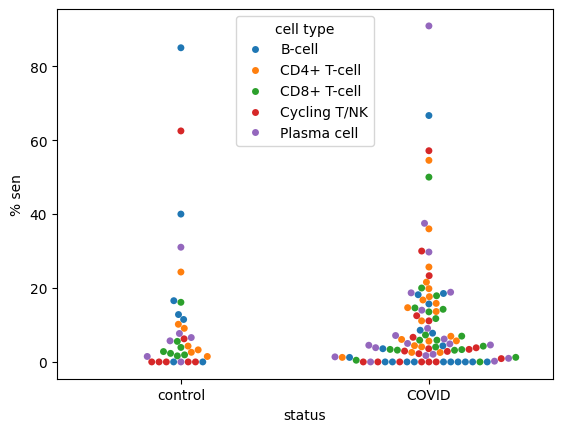

In [133]:
sns.swarmplot(data = lymph_res, x = 'status', y = '% sen', hue='cell type')

In [134]:
a = adata.obsm['sen_outlier'].sum(axis = 1)
a[a > 0] = 1

In [135]:
a

TTTGACTAGAGCCGAT-1_15    0
TTAGTCTGTATTTCCT-1_15    1
AGGCATTCAGCTACAT-1_15    0
GGTGATTAGAGGATCC-1_15    1
CAGTTCCGTAGCACAG-1_15    1
                        ..
CCTAAGAAGTTGTCAC-1_27    0
CGTGAATCATGTCTAG-1_27    0
GCCGATGAGTAAACGT-1_27    0
AGGGTGAGTATCAGGG-1_27    0
ATGGATCAGAGAGCAA-1_27    0
Length: 98979, dtype: int64

In [136]:
adata.obs['sen_outlier'] = a.astype('category')

In [137]:
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,status,sen_outlier
TTTGACTAGAGCCGAT-1_15,L08cov,False,2576,2576,5714.0,0.0,0.0,1.0,0.017501,0,0,4,1.754386,AT1,COVID,0
TTAGTCTGTATTTCCT-1_15,L08cov,False,2546,2546,5608.0,0.0,0.0,19.0,0.338802,0,0,9,1.787630,AT2,COVID,1
AGGCATTCAGCTACAT-1_15,L08cov,False,2527,2527,5431.0,0.0,0.0,0.0,0.000000,0,0,15,1.843998,Airway epithelial,COVID,0
GGTGATTAGAGGATCC-1_15,L08cov,False,2531,2531,5489.0,0.0,0.0,0.0,0.000000,0,0,9,1.827819,AT2,COVID,1
CAGTTCCGTAGCACAG-1_15,L08cov,False,2503,2503,5446.0,0.0,0.0,10.0,0.183621,0,0,1,1.840604,Fibroblast,COVID,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,L22cov,False,344,344,413.0,0.0,0.0,0.0,0.000000,0,0,1,24.213076,Fibroblast,COVID,0
CGTGAATCATGTCTAG-1_27,L22cov,False,350,350,402.0,0.0,0.0,0.0,0.000000,0,0,0,24.937656,Macrophage,COVID,0
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,0,3,25.000000,AT2,COVID,0
AGGGTGAGTATCAGGG-1_27,L22cov,False,331,331,402.0,0.0,0.0,0.0,0.000000,0,0,9,24.937656,AT2,COVID,0


In [45]:
sc.set_figure_params(dpi_save = 600)

### Fig 7B

In [44]:
np.random.seed(1)
ri = np.random.permutation(list(range(adata.shape[0])))

/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


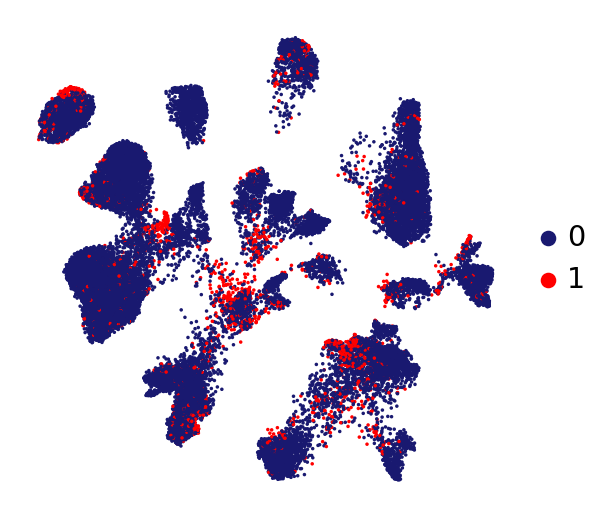

/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


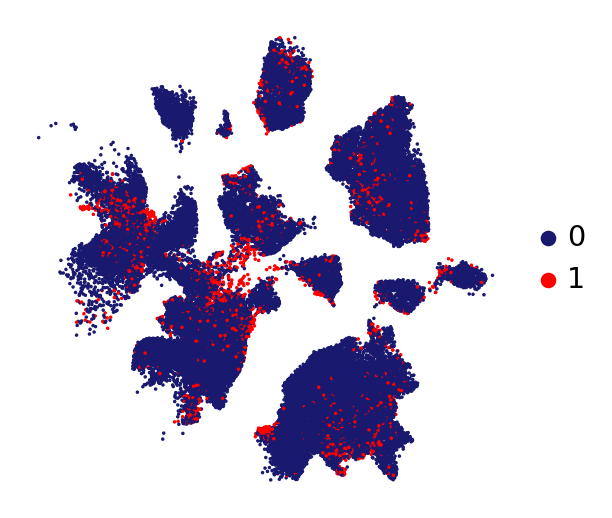

In [52]:


with rc_context({'figure.figsize': (4,4)}):
    
    sub = adata[adata.obs.status == 'control']
    ri = np.random.permutation(list(range(sub.shape[0])))
    sc.pl.umap(sub[ri,:], color = 'sen_outlier', size = 10, 
               palette = ['midnightblue', 'red'], frameon = False, title = '', save = '_R1_7B_pt1.png')
    
    sub = adata[adata.obs.status == 'COVID']
    ri = np.random.permutation(list(range(sub.shape[0])))
    sc.pl.umap(sub[ri,:], color = 'sen_outlier', size = 10, 
               palette = ['midnightblue', 'red'], frameon = False, title = '', save = '_R_7B_pt2.png')

In [138]:
epi_res['Class'] = 'epithelial'
mac_res['Class'] = 'macrophage'
fib_res['Class'] = 'fibroblast'
ec_res['Class'] = 'endothelial'
lymph_res['Class'] = 'lymphoid'

In [139]:
df = pd.concat([epi_res, mac_res, fib_res, ec_res, lymph_res]).reset_index(drop = True)
df

,cell type,Sample,n cells,status,n sen,% sen,Class
0,AT1,C51ctr,743,control,2,0.269179,epithelial
1,AT1,C52ctr,907,control,11,1.212789,epithelial
2,AT1,C53ctr,243,control,32,13.168724,epithelial
3,AT1,C54ctr,607,control,0,0.000000,epithelial
4,AT1,C55ctr,490,control,77,15.714286,epithelial
...,...,...,...,...,...,...,...
288,Plasma cell,L17cov,24,COVID,9,37.500000,lymphoid
289,Plasma cell,L18cov,33,COVID,30,90.909091,lymphoid
290,Plasma cell,L19cov,37,COVID,11,29.729730,lymphoid
291,Plasma cell,L21cov,123,COVID,6,4.878049,lymphoid


### Fig 7D

/tmp/ipykernel_2466154/956896863.py:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(data = df, y = '% sen', x = 'Class', hue = 'status',


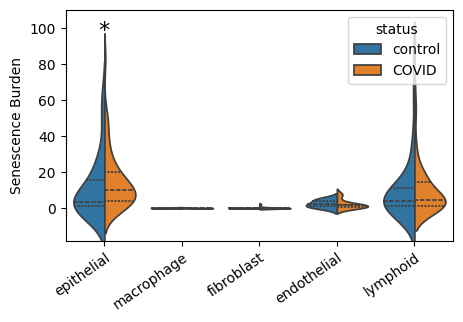

In [141]:
plt.figure(figsize = (5,3))

#sns.swarmplot(data = df, y = '% sen', x = 'Class', hue = 'status', size = 3)
ax = sns.violinplot(data = df, y = '% sen', x = 'Class', hue = 'status', 
               split = True, inner = 'quartiles', scale = 'width')


plt.text(x = 0, y = 95, s = '*', ha = 'center', size = '16')

plt.ylim(top = 110, bottom = -18)

plt.ylabel('Senescence Burden')
plt.xlabel('')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.savefig('figures/R1_7D.png', dpi = 600)


plt.show()

In [169]:


mat = df.pivot(index='cell type', columns='Sample', values='% sen')
mat = mat.fillna(0)
#mat = mat.apply(lambda row: (row - np.mean(row)) / np.std(row), axis=1)


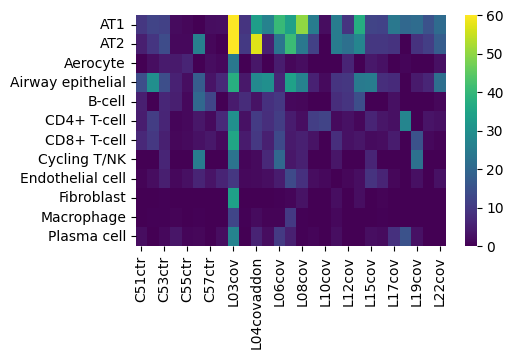

In [176]:
plt.figure(figsize = (5,3))

sns.heatmap(mat, cmap = 'viridis', vmax = 60)

plt.xlabel('')
plt.ylabel('')

plt.show()

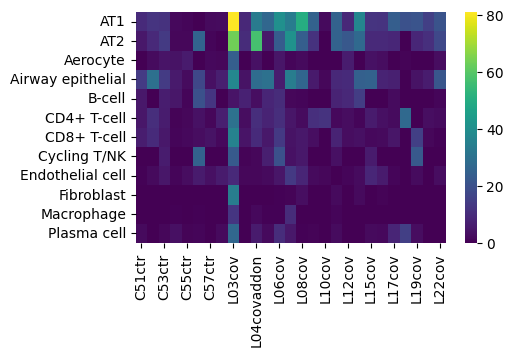

In [177]:
plt.figure(figsize = (5,3))

sns.heatmap(mat, cmap = 'viridis')

plt.xlabel('')
plt.ylabel('')

plt.show()

In [180]:
len(df.Sample.unique())

27